# レーダーチャート
レーダーチャートは複数の項目をまとめて比較する方法のひとつ。複数の項目がバランスよく高い値か、低い値かを確認するときに役に立つ。
すべての項目が「高ければ高いほど良い」か「低ければ低いほど良い」状態にすると比較しやすくなる。

> レーダーチャートは、複数の項目がある変量を構成比に直すことなく正多角形上に表現したグラフ。中心を0とし各項目ごとに値が大きいほど外側になるよう表現する。主に、それらの項目を属性としてもつ主体の性能などを比較するために用いる。（出典：[Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AC%E3%83%BC%E3%83%80%E3%83%BC%E3%83%81%E3%83%A3%E3%83%BC%E3%83%88)）

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

df = pd.DataFrame(
    index=["$AAA", "$BBB", "$CCC"],
    data={
        "EPS": [1, 2, 3],
        "Revenue": [3, 3, 2],
        "Guidance": [1, 2, 3],
        "D/E": [3, 2, 1],
        "PER": [1, 2, 3],
        "Dividend": [2, 3, 3],
    },
)

## レーダーチャートのプロット
- [matplotlib.projections](https://matplotlib.org/stable/api/projections_api.html)
- [set_theta_offset(offset)](https://matplotlib.org/stable/api/projections_api.html#matplotlib.projections.polar.PolarAxes.set_theta_offset)

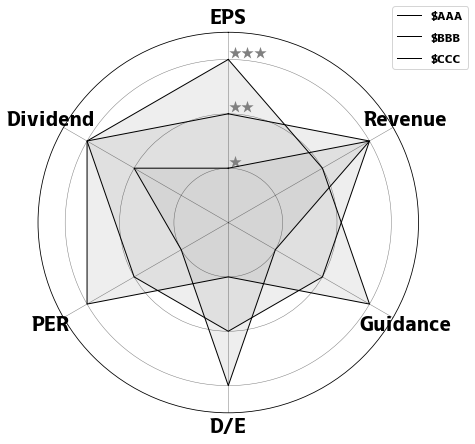

In [2]:
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2.0)
ax.set_theta_direction(-1)

# 各ラベルの位置調整
angles = [2 * n * pi / len(df.columns) for n in range(len((df.columns)))]
plt.xticks(angles, df.columns, size=20)
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3], ["★", "★★", "★★★"], color="grey", size=13)
plt.ylim(0, 3.5)

# 指定範囲の塗りつぶし
for ticker_symbol in ["$AAA", "$BBB", "$CCC"]:
    values = df.loc[ticker_symbol].values.flatten().tolist()
    ax.plot(
        angles + [0],
        values + [values[0]],
        linewidth=1,
        linestyle="solid",
        c="#000",
        label=ticker_symbol,
    )
    ax.fill(angles + [0], values + [values[0]], "#aaa", alpha=0.2)

plt.legend(bbox_to_anchor=(0.9, 1.1))
plt.show()